    # Automatic Jupyter Notebook for OpenML dataset 41021: Moneyball

In [1]:
from scripts.preamble import *
did = 41021
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, 10) 
topList 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


'This dataset has no runs yet'

In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised regression problem.


Complexity threshold to determine if an algorithm will be run.


In [3]:
comp = 50000000000000

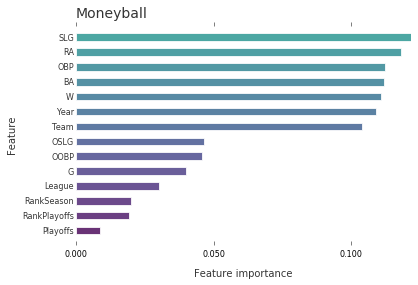

In [4]:
from scripts.featureImportance import *
featureImportance(data) 

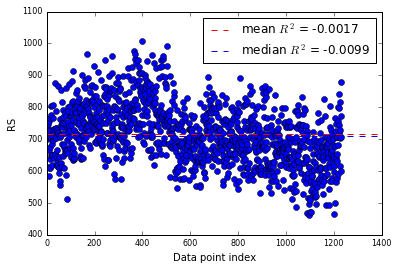

In [5]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

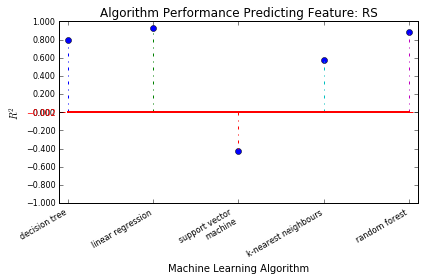

In [6]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 